Relativistic thin-foil electrodynamics
------------------------------------
Sergey Rykovanov


Primarily based on Bulanov et al, Phys. Plasmas 20, 123114 (2013)

We assume that a foil is delta-like. Ions are at the moment considered immobile and located at $x=0$. Laser pulse propagates from the left side $t-x$, everything is normalized in the usual relativistic laser-plasma way  ($e=1$, $m_e=1$, $c=1$, $\omega_L=1$). The model deals with the motion of the foil in the self-consistent way. Radiation from the foil itself is considered in the equations of motion. First, we start with the wave equation and its solutions in the case of the delta-foil.

$$\partial_{tt} \vec a - \partial_{xx} \vec a = -\alpha \delta(x-x_e(t)) \vec v$$

where $x_e(t)$ is the position of 1D delta-electron, $\vec v$ - its velocity, $\alpha=n_e\, d$ is the areal density of the foil with $n_e$ - assumed density and $d$ assumed thickness (for comparison with PIC simulations).

Green function for the 1D wave equation is:

$$G(t,t',x,x')=\frac{1}{2}\Theta\left(t-t'-\left|x-x'\right| \right)\mathrm{,}$$
where $\Theta(x)$ is the Heaviside step function. Using this Green function it is easy to obtain radiation produced by the motion of the electron in 1D (Lienard-Wiechert potentials analogs):

1) observer is to the left of the foil (for transverse electric field components):

$$\vec E(t,x)=\alpha\frac{\vec{v}(t^*)}{1+v_x(t^*)}$$

It is convenient to write in components:

$$E_y(t,x)=-B_z(t,x)$$
$$E_z(t,x)=B_y(t,x)$$

2) observer is to the right of the foil

$$\vec E(t,x)=\alpha\frac{\vec{v}(t^*)}{1-v_x(t^*)}$$

$$E_y(t,x)=B_z(t,x)$$
$$E_z(t,x)=-B_y(t,x)$$

Remembering that there is a laser pulse coming from the left, and that force from self-radiation is equal to the average of fields on the both sides of the foil, the total field components can be written in the following way:

$$\epsilon\equiv\frac{\alpha}{2}$$
$$E_x=R(x)$$
$$E_y=E_{y,L}+\epsilon \frac{u_y}{\gamma}\gamma_x^2$$
$$E_z=E_{z,L}+\epsilon \frac{u_z}{\gamma}\gamma_x^2$$
$$B_x=0$$
$$B_y=-E_{z,L}-\epsilon \frac{u_x u_z}{\gamma^2}\gamma_x^2$$
$$B_z=E_{y,L}+\epsilon \frac{u_x u_y}{\gamma^2}\gamma_x^2$$

Here, $R(x)$ is the model for the restoring force of the ions, typically $R(x)=\epsilon\, \mathrm{sign}(x)$, $u$ - 4-momentum components, $\gamma_x=\frac{1}{\sqrt{1-v_x^2}}$. We can now construct the usual electromagnetic tensor and use relativistic mechanics to treat electron motion:

$$\frac{du^{\mu}}{d\tau}=-F^{\mu\nu}u_{\nu}\mathrm{,}$$
where $\tau$ is the proper time. We then get:

$$\frac{d\gamma}{d\tau}=-E_xu_x-E_{y,L}u_y-E_{z,L}u_z-\epsilon\frac{\gamma_x^2}{\gamma}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_x}{d\tau}=-\gamma E_x-H_{z,L}u_y+H_{y,L}u_z-\epsilon\frac{u_x\gamma_x^2}{\gamma^2}\left(u_y^2+u_z^2 \right)$$
$$\frac{du_y}{d\tau}=-E_{y,L}\left(\gamma-u_x\right) - \epsilon u_y$$
$$\frac{du_z}{d\tau}=-E_{z,L}\left(\gamma-u_x\right) - \epsilon u_z$$


New variables:

$$\xi\equiv t-x$$
$$h\equiv\gamma-u_x$$
$$u_\perp\equiv u_y^2 + u_z^2$$

Then
$$\frac{d\xi}{d\tau}=h$$

$$u_x=\gamma-h=\frac{1+u_\perp^2-h^2}{2h}$$

After some manipulations we get:

$$\frac{dh}{d\xi}=E_x-\epsilon\frac{u_\perp^2}{1+u_\perp^2}$$
$$\frac{dx}{d\xi}=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$\frac{du_y}{d\xi}=-E_{y,L}-\epsilon \frac{u_y}{h}$$
$$\frac{du_z}{d\xi}=-E_{z,L}-\epsilon \frac{u_z}{h}$$

Noticing, that $\frac{u_y}{h}=\frac{dy}{d\xi}$, we get the following set of master equations:

$$h'=E_x-\epsilon \frac{u_\perp^2}{1+u_\perp^2}$$
$$x'=\frac{1+u_\perp^2-h^2}{2h^2}$$
$$y'=\frac{u_y}{h}$$
$$z'=\frac{u_z}{h}$$
$$u_y=a_{y,L}-\epsilon y$$
$$u_z=a_{z,L}-\epsilon z$$

Below we solve these equations using RK4 method (`scipy.integrate.ode`)

In [2]:
%pylab inline
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib


/home/sumvorax/.local/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [3]:
# parameters of the model

# parameters of laser pulse components y and z
a0_y=20.0
a0_z=20.0
phase_y=0.0
phase_z=pi/2
duration=5*2*pi

# parameters of the foil
density=400.0
thickness=0.01*2*pi
alpha=density*thickness
epsilon=alpha*0.5

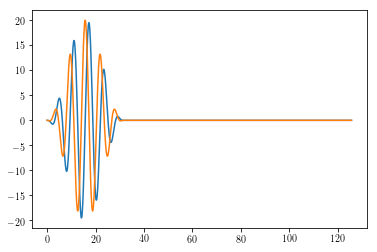

In [4]:
# pulse shapes functions
def pulse_y(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_y*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_y)
    else:
        toret = 0.0
    return toret


def pulse_z(xi):
    if((xi)>=0) and ((xi)<duration):
        toret = a0_z*sin(pi*(xi)/duration)**2*sin(xi-duration/2+phase_z)
    else:
        toret = 0.0
    return toret

# check the pulse shape function

x=linspace(0,20*2*pi, 1000)
pulsey=zeros(len(x))
pulsez=zeros(len(x))

for n,xx in enumerate(x):
    #print(n,xx)
    pulsey[n]=pulse_y(xx)
    pulsez[n]=pulse_z(xx)
    
    
plot(x, pulsey)
plot(x, pulsez)
#plot(x, pulsey**2+pulsez**2)

628320


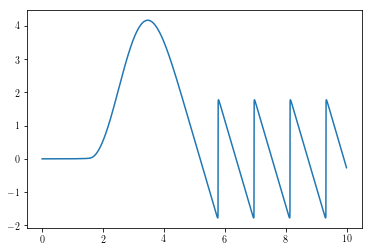

In [5]:
# for RK4 we assume:
# xi = t-x
# y0 -> h(xi)
# y1 -> x(xi)
# y2 -> y(xi)
# y3 -> z(xi)

# defining the force vector for odeint
# note that restoring force is smoothed using the tanh
def f(xi,y):
    ay = pulse_y(xi)
    az = pulse_z(xi)
    u_perp_sqr = (ay-epsilon*y[2])**2+(az-epsilon*y[3])**2
#    restoring_field=sign(y[1])
    #restoring_field=density*y[1]
    restoring_field=tanh(y[1]/(thickness/8))
    
    f0 = epsilon*(restoring_field-u_perp_sqr/(1+u_perp_sqr))
    f1 = 0.5/y[0]**2*(1-y[0]**2+u_perp_sqr)
    f2 = 1./y[0]*(ay-epsilon*y[2])
    f3 = 1./y[0]*(az-epsilon*y[3])
    return [f0,f1,f2,f3]

r=scipy.integrate.ode(f, jac=None)
r.set_integrator('dopri5')
r.set_initial_value([1.0, 0., 0., 0.], 0.)

xi_end=10*2*pi
dxi=0.0001

xi=[0.]
h=[1.0]
x=[0.0]
y=[0.0]
z=[0.0]
ay=[0.0]
az=[0.0]

while r.successful() and r.t < xi_end:
    r.integrate(r.t+dxi)
    xi.append(r.t)
    h.append(r.y[0])
    x.append(r.y[1])
    y.append(r.y[2])
    z.append(r.y[3])
    
xi=np.array(xi)
h=np.array(h)
x=np.array(x)
y=np.array(y)
z=np.array(z)

plot(xi/2/pi, x)
print(len(xi))

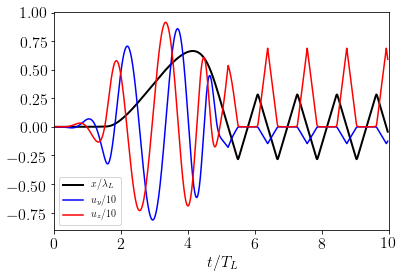

In [6]:
sw=1.

ux=scipy.integrate.cumtrapz(x,xi)*h[1:]
uy=scipy.integrate.cumtrapz(y,xi)*h[1:]
uz=scipy.integrate.cumtrapz(z,xi)*h[1:]

plot(xi/2/pi+sw*x/2/pi, x/2/pi, 'k', lw=2, label='$x/\lambda_L$')
#plot(xi/2/pi+sw*x/2/pi, y/2/pi)
plot(xi[1:]/2/pi+sw*x[1:]/2/pi, uy/10, 'b', label='$u_y/10$')
plot(xi[1:]/2/pi+sw*x[1:]/2/pi, uz/10, 'r', label='$u_z/10$')
#plot(xi[1:]/2/pi+sw*x[1:]/2/pi, ux)
#plot(ux)
xlim(0,10)
legend()
xlabel('$t/T_L$', fontsize=16)
xticks(fontsize=16)
yticks(fontsize=16)

savefig('model_cp_atto.pdf', dpi=150)

In [300]:
#!cp model_cp_atto.pdf /Users/sleepyhead/Desktop/

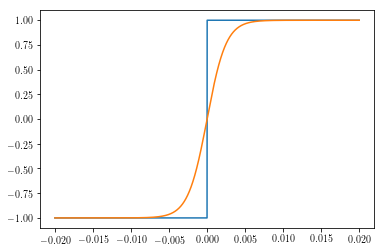

In [7]:
xx=linspace(-0.02*2*pi, 0.02*2*pi, 10000)

plot(xx/2/pi, sign(xx))
approx_sign = tanh(xx/(0.01/4*2*pi))

plot(xx/2/pi, approx_sign)